<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.70, random_state=24)

In [ ]:
X[:5]

array([[11.52944329, -6.16434807],
       [ 9.11038572,  4.57943551],
       [ 9.89927463, -2.88490122],
       [-2.64225059,  2.99412021],
       [10.11543896, -5.0669862 ]])

In [ ]:
y[:5]

array([1, 0, 3, 2, 1])

In [ ]:
df = pd.DataFrame(data = X, columns = ["X1", "X2"])
df["y"] = y 

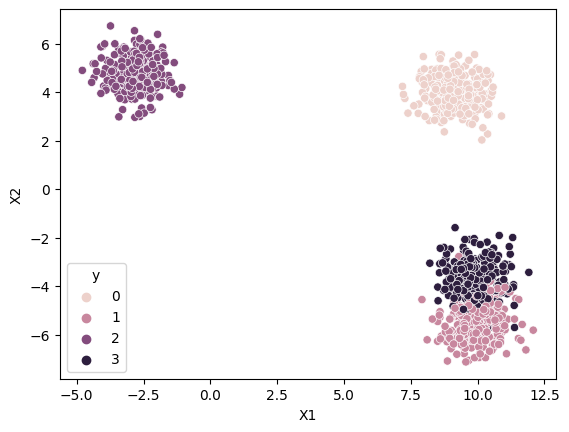

In [ ]:
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "y")
plt.show()

In [ ]:
df.shape

(500, 3)

In [ ]:
for i in range(1,5):
  kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
  kmeans.fit(df[["X1","X2"]])
  df["k"+ str(i)] = kmeans.labels_


In [ ]:
df.head()

,X1,X2,y,k1,k2,k3,k4
0,11.529443,-6.164348,1,0,0,0,0
1,9.110386,4.579436,0,2,2,2,2
2,9.899275,-2.884901,3,3,3,3,3
3,-2.642251,2.994120,2,1,1,1,1
4,10.115439,-5.066986,1,0,0,0,0


In [ ]:
df["k4"] = kmeans.labels_

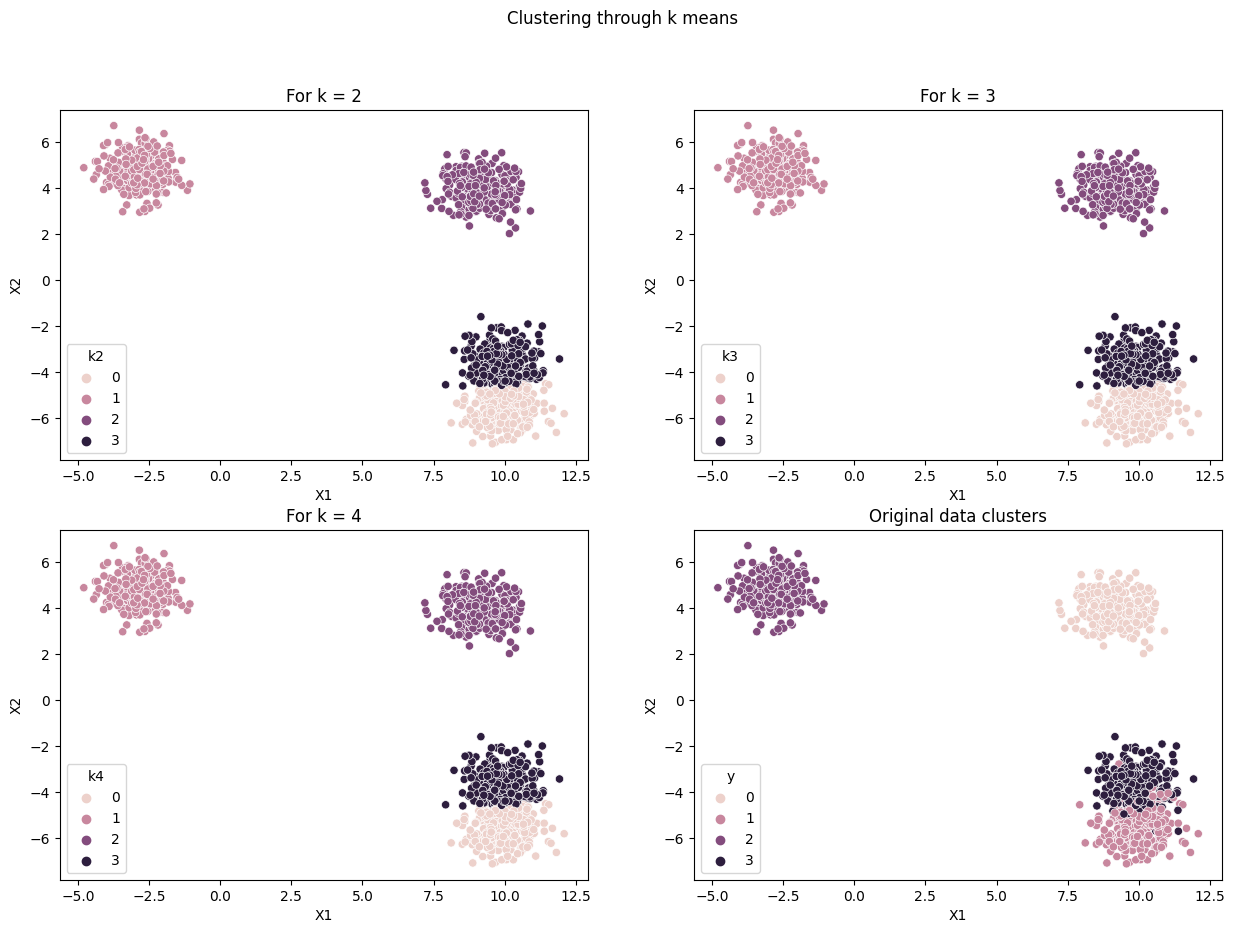

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (15,10))
fig.suptitle('Clustering through k means')
# plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "k2", ax = ax[0,0])
ax[0,0].set_title("For k = 2")
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "k3", ax = ax[0,1])
ax[0,1].set_title("For k = 3")
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "k4", ax = ax[1,0])
ax[1,0].set_title("For k = 4")
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "y", ax = ax[1,1])
ax[1,1].set_title("Original data clusters")
plt.show()

In [ ]:
kmeans.inertia_

898.8750265338324

In [ ]:
ssd = []
k = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
  kmeans.fit(df[["X1","X2"]])
  k.append(i)
  ssd.append(kmeans.inertia_)



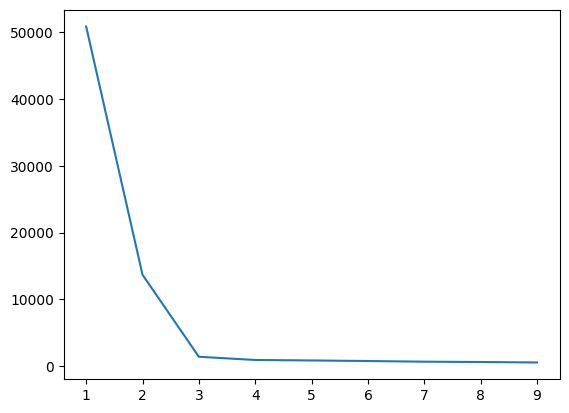

In [ ]:
plt.plot(k, ssd)

In [ ]:
ssd

[50897.89850117468,
 13680.642742270149,
 1380.2020699003795,
 898.8750265338324,
 827.5832376086732,
 742.6211077934465,
 643.9747803437363,
 593.843494551078,
 524.9766977338293]

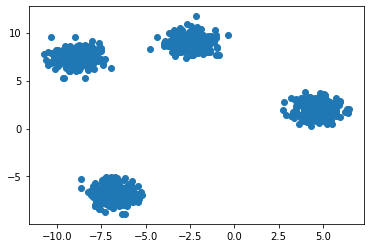

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

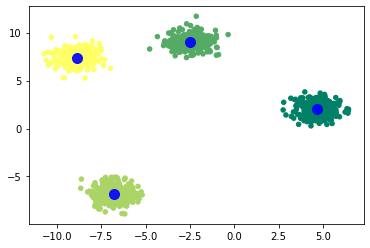

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

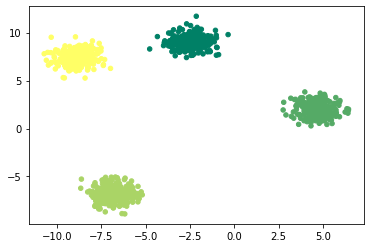

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='summer')
plt.show()

In [ ]:
# The lowest SSE value
kmeans.inertia_

955.6508502674728

In [ ]:
 # Final locations of the centroid
 kmeans.cluster_centers_

array([[ 4.65228723,  2.01082312],
       [-2.51307284,  9.02437832],
       [-6.78569264, -6.83349517],
       [-8.85983437,  7.3848214 ]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [ ]:
sse

[65968.05890070874,
 30535.580666479473,
 6326.841941222678,
 955.6508502674728,
 867.2570507177677,
 780.3450273371444,
 707.6894557278113,
 622.3455789971233,
 565.5121825291794]

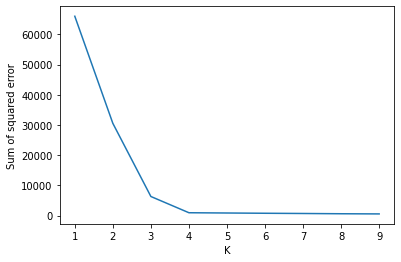

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)